# Baigiamasis Darbas 'Kredito kortelės naudotojų analizė'

In [ ]:
# Turime dvi lenteles 'application_record' ir 'credit_record' su kredito kortelių naudotojų asmens duomenimis 
# ir informacija apie paskolos grąžinimą mėnesiais:

# Darbo tikslas išnagrinėti:
#   1. kredito kortelių naudotojų portretą (Kas daugiau naudojasi kredito mokėjimo kortelėmis?)
#   2. apskaičiuojant kiekvieno naudotojo kredito reitingą, išnagrinėti, kas turi įtakos kredito reitingui?
#   3. kaip priklauso paskolos grąžinimo lygį nuo tokių asmens duomenų kaip lytis, amžius, išsilavinimas, 
# profesijos tipas, automobilio turėjimas, pajamų šaltinis, šeiminė padėtis, šeimos dydis, darbo stažas, 
# vaikų skaičius, nekilnojamojo turto turėjimas, būsto tipas?
#   4. koreliaciją tarp pajamų dydžio ir kreditinių kortelių skolos(Ar mažiau uždirbančių žmonės skolinasi daugiau?)

![](https://www.pngall.com/wp-content/uploads/2/Credit-Card-Transparent.png)

## Duomenų lentelių informacija

In [348]:
import pandas as pd
import numpy as np
import mysql.connector
import seaborn as sns

In [346]:
mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password=''
)
cursor = mydb.cursor()
cursor.execute('USE cc_dataset')
ar = pd.read_sql('SELECT ID AS id, CODE_GENDER AS gender, FLAG_OWN_CAR AS car, FLAG_OWN_REALTY AS realty, NAME_HOUSING_TYPE AS housing_type, NAME_FAMILY_STATUS AS marital_status, CNT_CHILDREN AS children, CNT_FAM_MEMBERS AS family_size, AMT_INCOME_TOTAL AS annual_income, NAME_INCOME_TYPE AS income_type, OCCUPATION_TYPE AS occupation, NAME_EDUCATION_TYPE AS education_level, DAYS_BIRTH AS days_birth, DAYS_EMPLOYED AS days_employed FROM application_record', con=mydb)
ar

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,days_birth,days_employed
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,-12005,-4542
1,5008805,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,-12005,-4542
2,5008806,M,Y,Y,House / apartment,Married,0,2.0,112500.0,Working,Security staff,Secondary / secondary special,-21474,-1134
3,5008808,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,-19110,-3051
4,5008809,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,-19110,-3051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,House / apartment,Separated,0,1.0,135000.0,Pensioner,,Secondary / secondary special,-22717,365243
438553,6840222,F,N,N,House / apartment,Single / not married,0,1.0,103500.0,Working,Laborers,Secondary / secondary special,-15939,-3007
438554,6841878,F,N,N,With parents,Single / not married,0,1.0,54000.0,Commercial associate,Sales staff,Higher education,-8169,-372
438555,6842765,F,N,Y,House / apartment,Married,0,2.0,72000.0,Pensioner,,Secondary / secondary special,-21673,365243


In [351]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               438557 non-null  int64  
 1   gender           438557 non-null  object 
 2   car              438557 non-null  object 
 3   realty           438557 non-null  object 
 4   housing_type     438557 non-null  object 
 5   marital_status   438557 non-null  object 
 6   children         438557 non-null  int64  
 7   family_size      438557 non-null  float64
 8   annual_income    438557 non-null  float64
 9   income_type      438557 non-null  object 
 10  occupation       438557 non-null  object 
 11  education_level  438557 non-null  object 
 12  days_birth       438557 non-null  int64  
 13  days_employed    438557 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 46.8+ MB


In [352]:
ar.describe()

,id,children,family_size,annual_income,days_birth,days_employed
count,4.385570e+05,438557.000000,438557.000000,4.385570e+05,438557.000000,438557.000000
mean,6.022176e+06,0.427390,2.194465,1.875243e+05,-15997.904649,60563.675328
std,5.716370e+05,0.724882,0.897207,1.100869e+05,4185.030007,138767.799647
min,5.008804e+06,0.000000,1.000000,2.610000e+04,-25201.000000,-17531.000000
25%,5.609375e+06,0.000000,2.000000,1.215000e+05,-19483.000000,-3103.000000
50%,6.047745e+06,0.000000,2.000000,1.607805e+05,-15630.000000,-1467.000000
75%,6.456971e+06,1.000000,3.000000,2.250000e+05,-12514.000000,-371.000000
max,7.999952e+06,19.000000,20.000000,6.750000e+06,-7489.000000,365243.000000


In [214]:
mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password=''
)
cursor = mydb.cursor()
cursor.execute('USE cc_dataset')
cr = pd.read_sql('SELECT ID AS id, MONTHS_BALANCE AS months_balance, STATUS AS status FROM credit_record', con=mydb)
cr

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
#Statuso reikšmės:
#'C' reiškia 'buvo sumokėta laiku', 
#'X' reiškia 'kredito nebuvo šį mėnesį'
#'0' reiškia 'klientas pavėlavo sumokėti 0-29 dd.'
#'1' reiškia 'klientas pavėlavo sumokėti 30-59 dd.'
#'2' reiškia 'klientas pavėlavo sumokėti 60-89 dd.'
#'3' reiškia 'klientas pavėlavo sumokėti 90-119 dd.'
#'4' reiškia 'klientas pavėlavo sumokėti 120-149 dd.'
#'5' reiškia 'Pradelstos ar beviltiškos skolos, klientas pavėlavo sumokėti >150 dd.'

In [215]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [353]:
#Paskaičiuojame unikalus klientus iš lentelės 'ar'
len(ar['id'].unique())

438510

In [218]:
#Paskaičiuojame unikalus klientus iš lentelės 'cr'
len(cr['id'].unique())

45985

## Kredito kortelių naudotojų portretas

In [362]:
# Paimsime lentelę 'ar' su 438510 unikalių kredito kortelių naudotojų ir pavadinsime ją 'arp'
arp = ar
arp

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,days_birth,days_employed
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,-12005,-4542
1,5008805,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,-12005,-4542
2,5008806,M,Y,Y,House / apartment,Married,0,2.0,112500.0,Working,Security staff,Secondary / secondary special,-21474,-1134
3,5008808,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,-19110,-3051
4,5008809,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,-19110,-3051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,House / apartment,Separated,0,1.0,135000.0,Pensioner,,Secondary / secondary special,-22717,365243
438553,6840222,F,N,N,House / apartment,Single / not married,0,1.0,103500.0,Working,Laborers,Secondary / secondary special,-15939,-3007
438554,6841878,F,N,N,With parents,Single / not married,0,1.0,54000.0,Commercial associate,Sales staff,Higher education,-8169,-372
438555,6842765,F,N,Y,House / apartment,Married,0,2.0,72000.0,Pensioner,,Secondary / secondary special,-21673,365243


### Pagal lytį

In [363]:
df17 = arp['gender'].value_counts()
df17

F    294440
M    144117
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal lytį'}>

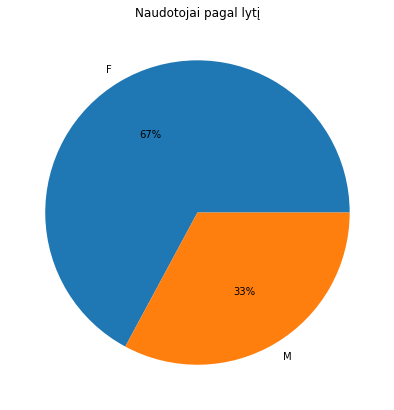

In [417]:
df17.plot.pie(ylabel='', title='Naudotojai pagal lytį', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro moterys (67%)

### Pagal amžių

In [365]:
#Amžius priskiriame amžiaus intervalams(20: nuo 20 iki 30, 30:nuo 30 iki 40,...)
arp['days_birth']=round(arp['days_birth']/(-365))
arp['days_birth']

0         33.0
1         33.0
2         59.0
3         52.0
4         52.0
          ... 
438552    62.0
438553    44.0
438554    22.0
438555    59.0
438556    52.0
Name: days_birth, Length: 438557, dtype: float64

In [366]:
arp.rename(columns={'days_birth': 'age'}, inplace=True)

In [372]:
arp['age']=(arp['age']//10)*10
arp.head(3)

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,days_employed
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,-4542
1,5008805,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,-4542
2,5008806,M,Y,Y,House / apartment,Married,0,2.0,112500.0,Working,Security staff,Secondary / secondary special,50.0,-1134


In [373]:
df18 = arp['age'].value_counts().sort_values()
df18

60.0     51017
20.0     51815
50.0     96496
40.0    114957
30.0    124272
Name: age, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal amžių'}>

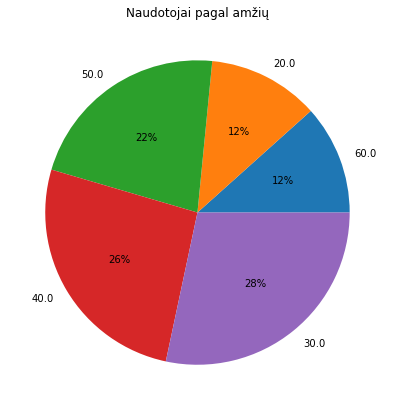

In [416]:
df18.plot.pie(ylabel='', title='Naudotojai pagal amžių', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Pagrindiniai kredito kortelių naudotojai - žmonės nuo 30 iki 60 metų (76%)

### Pagal išsilavinimą

In [378]:
df19 = arp['education_level'].value_counts()
df19

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: education_level, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal išsilavinimą'}>

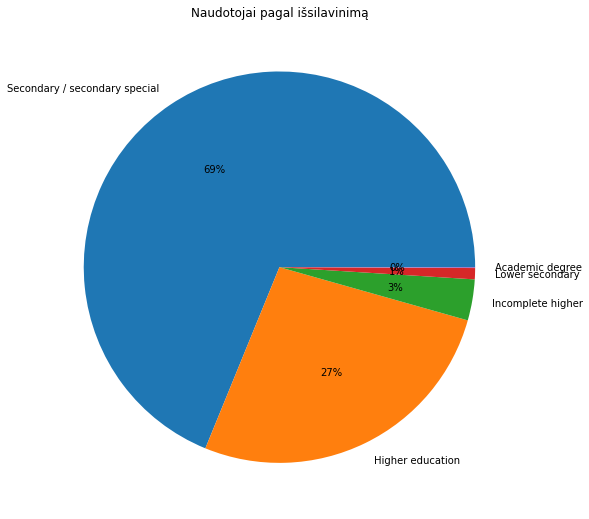

In [543]:
df19.plot.pie(ylabel='', title='Naudotojai pagal išsilavinimą', autopct='%1.0f%%', figsize=(9, 9))

In [390]:
# Daugumą kredito kortelių naudotojų sudaro žmonės turintys vidurinį išsilavinimą (69%)

### Pagal pajamų šaltinį

In [398]:
df20 = arp['income_type'].value_counts()
df20

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: income_type, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal pajamų šaltinį'}>

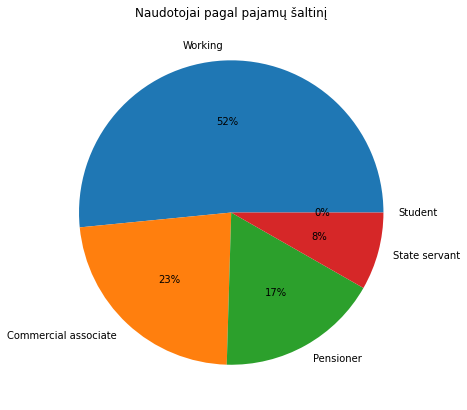

In [413]:
df20.plot.pie(ylabel='', title='Naudotojai pagal pajamų šaltinį', autopct='%1.0f%%', figsize=(7, 7))

In [402]:
# Daugumą kredito kortelių naudotojų sudaro dirbantys žmonės (52%)

### Pagal šeiminę padėtį

In [418]:
df21 = arp['marital_status'].value_counts()
df21

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: marital_status, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal šeiminę padėtį'}>

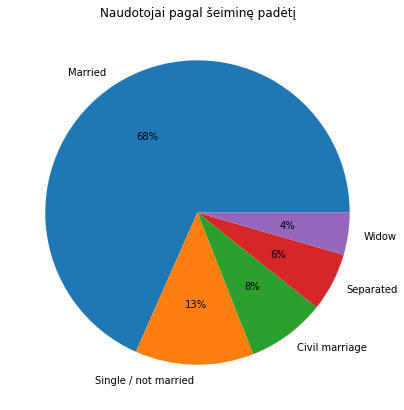

In [419]:
df21.plot.pie(ylabel='', title='Naudotojai pagal šeiminę padėtį', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro vedę žmonės (68%)

### Pagal šeimos dydį

In [420]:
df22 = arp['family_size'].value_counts()
df22

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: family_size, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal šeimos dydį'}>

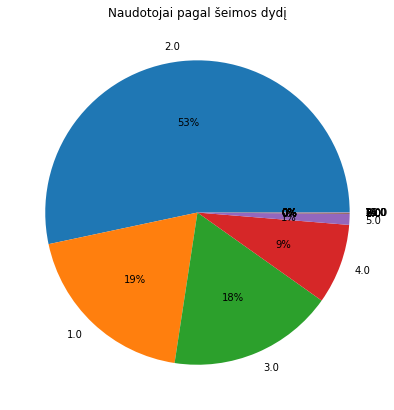

In [424]:
df22.plot.pie(ylabel='', title='Naudotojai pagal šeimos dydį', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės turintys dviejų žmonių šeimą (53%)

### Pagal vaikų skaičių

In [425]:
df23 = arp['children'].value_counts()
df23

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
6          4
12         4
14         3
19         1
Name: children, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal vaikų skaičių'}>

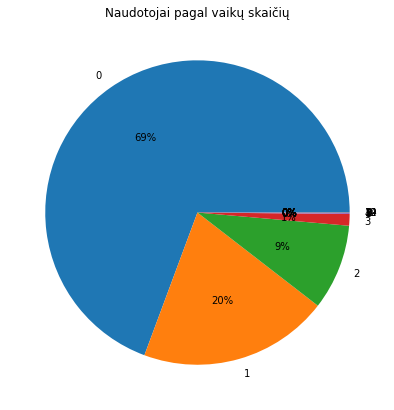

In [426]:
df23.plot.pie(ylabel='', title='Naudotojai pagal vaikų skaičių', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės neturintys vaikų (69%)

### Pagal automobilio turėjimą

In [427]:
df24 = arp['car'].value_counts()
df24

N    275459
Y    163098
Name: car, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal automobilio turėjimą'}>

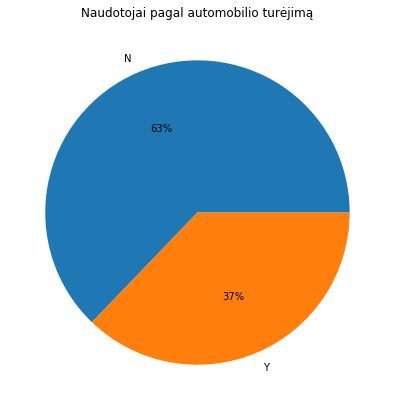

In [429]:
df24.plot.pie(ylabel='', title='Naudotojai pagal automobilio turėjimą', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės neturintys automobilio (63%)

### Pagal nekilnojamojo turto turėjimą

In [430]:
df25 = arp['realty'].value_counts()
df25

Y    304074
N    134483
Name: realty, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal nekilnojamojo turto turėjimą'}>

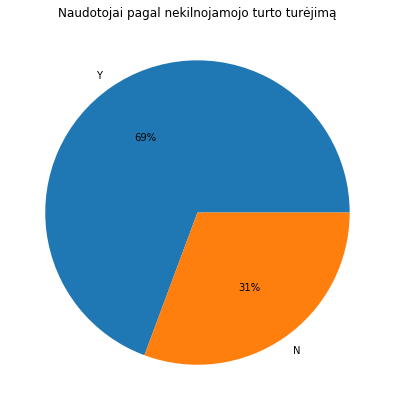

In [431]:
df25.plot.pie(ylabel='', title='Naudotojai pagal nekilnojamojo turto turėjimą', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės turintys nekilnojamąjį turtą (69%)

### Pagal būsto tipą

In [432]:
df26 = arp['housing_type'].value_counts()
df26

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: housing_type, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal būsto tipą'}>

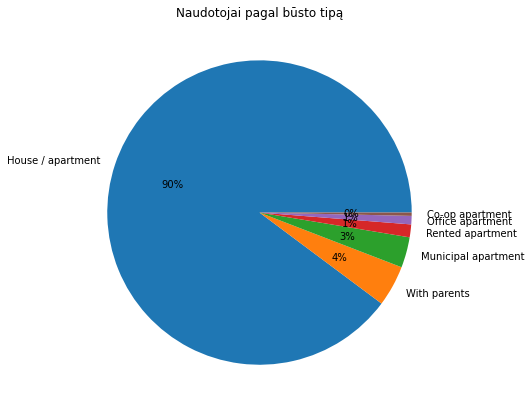

In [433]:
df26.plot.pie(ylabel='', title='Naudotojai pagal būsto tipą', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės gyvenantys namuose arba bute (90%)

### Pagal darbo stažą

In [437]:
arp['days_employed']=round(arp['days_employed']/(-365))
arp['days_employed']

0           12.0
1           12.0
2            3.0
3            8.0
4            8.0
           ...  
438552   -1001.0
438553       8.0
438554       1.0
438555   -1001.0
438556       3.0
Name: days_employed, Length: 438557, dtype: float64

In [438]:
arp.rename(columns={'days_employed': 'years_employed'}, inplace=True)

In [439]:
arp['years_employed']=(arp['years_employed']//10)*10
arp.head(3)

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,years_employed
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0
1,5008805,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0
2,5008806,M,Y,Y,House / apartment,Married,0,2.0,112500.0,Working,Security staff,Secondary / secondary special,50.0,0.0


In [446]:
arp['years_employed'] = arp['years_employed'].replace([-1010.0], ['Unemployed'])

In [447]:
df27 = arp['years_employed'].value_counts().sort_values()
df27

40.0             447
30.0            4307
20.0           17937
10.0           70285
Unemployed     75329
0.0           270252
Name: years_employed, dtype: int64

<AxesSubplot:title={'center':'Naudotojai pagal darbo stažą'}>

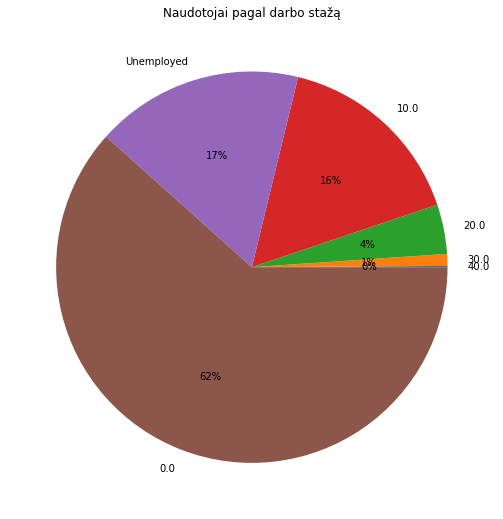

In [545]:
df27.plot.pie(ylabel='', title='Naudotojai pagal darbo stažą', autopct='%1.0f%%', figsize=(9, 9))

In [ ]:
# Daugumą kredito kortelių naudotojų sudaro žmonės turintys mažiau nei 10 metų darbo stažą (62%)

## Kredito reitingo priklausomybė nuo asmens duomenų

### Kredito reitingo skaičiavimas

In [450]:
#Sujungiame dvi lenteles pagal kliento id
df = pd.merge(ar, cr, on=['id'])
df.head(3)

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,years_employed,months_balance,status
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,0,C
1,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-1,C
2,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-2,C


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               777715 non-null  int64  
 1   gender           777715 non-null  object 
 2   car              777715 non-null  object 
 3   realty           777715 non-null  object 
 4   housing_type     777715 non-null  object 
 5   marital_status   777715 non-null  object 
 6   children         777715 non-null  int64  
 7   family_size      777715 non-null  float64
 8   annual_income    777715 non-null  float64
 9   income_type      777715 non-null  object 
 10  occupation       777715 non-null  object 
 11  education_level  777715 non-null  object 
 12  age              777715 non-null  float64
 13  years_employed   777715 non-null  object 
 14  months_balance   777715 non-null  int64  
 15  status           777715 non-null  object 
dtypes: float64(3), int64(3), object(10)
me

In [453]:
#Pakeisime stulpelio statuso reikšmes ir tipo į int, kad vėliau galėtumėm apskaičiuoti kredito reitingus:
#'C' reiškia 'buvo sumokėta laiku', 
#'X' reiškia 'kredito nebuvo šį mėnesį'
#'0' reiškia 'klientas pavėlavo sumokėti 0-29 dd.'
#'1' reiškia 'klientas pavėlavo sumokėti 30-59 dd.'
#'2' reiškia 'klientas pavėlavo sumokėti 60-89 dd.'
#'3' reiškia 'klientas pavėlavo sumokėti 90-119 dd.'
#'4' reiškia 'klientas pavėlavo sumokėti 120-149 dd.'
#'5' reiškia 'Pradelstos ar beviltiškos skolos, klientas pavėlavo sumokėti >150 dd.'
df['status'] = df['status'].replace(['C', 'X'], [-1, -1])
df

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,years_employed,months_balance,status
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,0,-1
1,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-1,-1
2,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-2,-1
3,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-3,-1
4,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,Rented apartment,Single / not married,0,1.0,112500.0,Working,Laborers,Secondary / secondary special,20.0,0.0,-9,0
777711,5150337,M,N,Y,Rented apartment,Single / not married,0,1.0,112500.0,Working,Laborers,Secondary / secondary special,20.0,0.0,-10,2
777712,5150337,M,N,Y,Rented apartment,Single / not married,0,1.0,112500.0,Working,Laborers,Secondary / secondary special,20.0,0.0,-11,1
777713,5150337,M,N,Y,Rented apartment,Single / not married,0,1.0,112500.0,Working,Laborers,Secondary / secondary special,20.0,0.0,-12,0


In [454]:
df['status'].dtype

dtype('O')

In [456]:
df['status'] = df['status'].astype('int64')

In [458]:
df.rename(columns={'status': 'rating'}, inplace=True)
df.head(3)

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,years_employed,months_balance,rating
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,0,-1
1,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-1,-1
2,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-2,-1


In [459]:
# Skaičiuojame kredito reitingą kiekvienam klientui pagal 'id' 
df1 = df.groupby('id')['rating'].sum()
df1

id
5008804   -13
5008805   -12
5008806   -23
5008808    -3
5008809    -5
           ..
5150482    -6
5150483   -18
5150484    -1
5150485     0
5150487   -30
Name: rating, Length: 36457, dtype: int64

In [461]:
# Sujungiame dvi lenteles su paskaičiuotu reitingu pagal kliento id
df2 = pd.merge(arp, df1, on=['id'])
df2

,id,gender,car,realty,housing_type,marital_status,children,family_size,annual_income,income_type,occupation,education_level,age,years_employed,rating
0,5008804,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-13
1,5008805,M,Y,Y,Rented apartment,Civil marriage,0,2.0,427500.0,Working,,Higher education,30.0,10.0,-12
2,5008806,M,Y,Y,House / apartment,Married,0,2.0,112500.0,Working,Security staff,Secondary / secondary special,50.0,0.0,-23
3,5008808,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,50.0,0.0,-3
4,5008809,F,N,Y,House / apartment,Single / not married,0,1.0,270000.0,Commercial associate,Sales staff,Secondary / secondary special,50.0,0.0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,House / apartment,Married,0,2.0,315000.0,Working,Managers,Secondary / secondary special,40.0,0.0,11
36453,5149834,F,N,Y,House / apartment,Married,0,2.0,157500.0,Commercial associate,Medicine staff,Higher education,30.0,0.0,48
36454,5149838,F,N,Y,House / apartment,Married,0,2.0,157500.0,Pensioner,Medicine staff,Higher education,30.0,0.0,39
36455,5150049,F,N,Y,House / apartment,Married,0,2.0,283500.0,Working,Sales staff,Secondary / secondary special,40.0,0.0,3


In [464]:
df2['rating'].describe()

count    36457.000000
mean       -12.502071
std         14.968721
min        -61.000000
25%        -21.000000
50%         -8.000000
75%         -1.000000
max        235.000000
Name: rating, dtype: float64

In [ ]:
# Turime asmens duomenų ir kredito kortelių įrašus apie 36457 klientus.

### Reitingas pagal pajamų šaltinį

In [476]:
df3 = df2.groupby('income_type')['rating'].mean().sort_values().abs().round()
df3

income_type
Student                 24.0
State servant           13.0
Working                 13.0
Commercial associate    12.0
Pensioner               12.0
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal pajamų šaltinį'}>

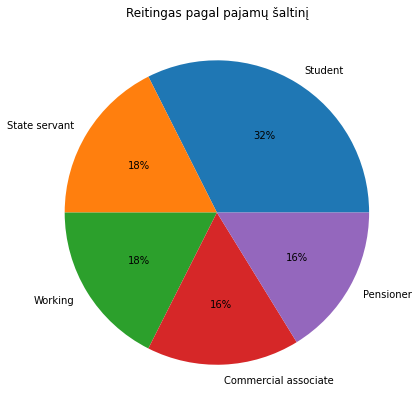

In [470]:
df3.plot.pie(ylabel='', title='Reitingas pagal pajamų šaltinį', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='income_type', ylabel='rating'>

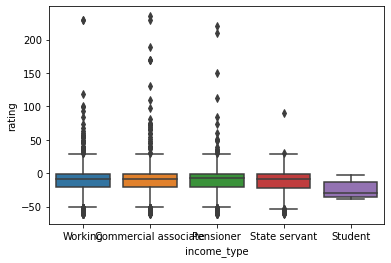

In [501]:
sns.boxplot(x='income_type', y='rating', data=df2)

In [ ]:
# Aukštesnį kredito reitingą turi studentai. Didesnę tikimybę negrąžinti paskolos laiku turi prekybininkų atstovai, 
# pensininkai ir dirbantys žmonės.

### Reitingas pagal išsilavinimą

In [494]:
df4 = df2.groupby('education_level')['rating'].mean().sort_values().abs()
df4

education_level
Academic degree                  19.156250
Lower secondary                  14.387701
Higher education                 12.893451
Incomplete higher                12.376596
Secondary / secondary special    12.316342
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal išsilavinimą'}>

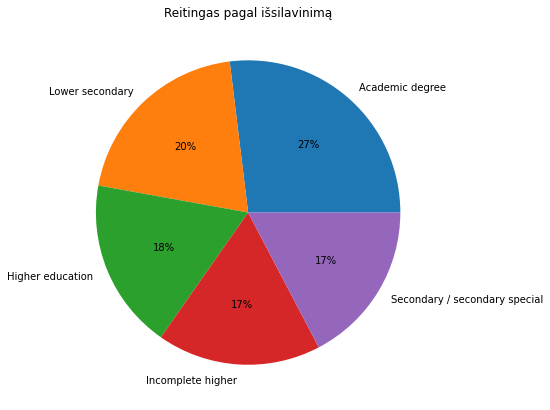

In [496]:
df4.plot.pie(ylabel='', title='Reitingas pagal išsilavinimą', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='education_level', ylabel='rating'>

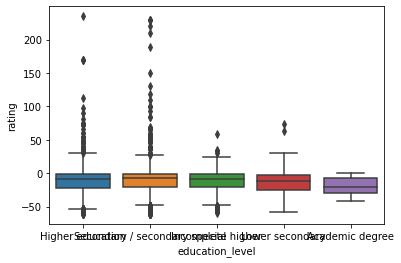

In [498]:
sns.boxplot(x='education_level', y='rating', data=df2)

In [ ]:
# Aukštesnį kredito reitingą turi žmonės su akademiniu laipsniu. Didesnę tikimybę negrąžinti paskolos laiku turi 
# žmonės su viduriniu išsilavinimu.

### Reitingas pagal lytį

In [502]:
df5 = df2.groupby('gender')['rating'].mean().sort_values().abs()
df5

gender
M    12.529725
F    12.488457
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal lytį'}>

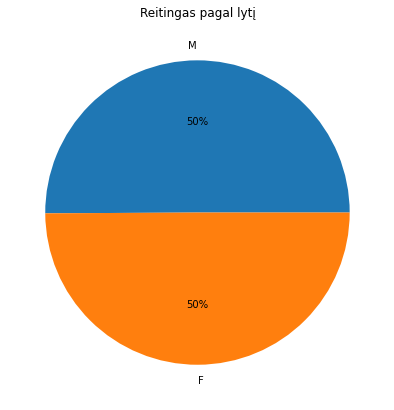

In [504]:
df5.plot.pie(ylabel='', title='Reitingas pagal lytį', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='gender', ylabel='rating'>

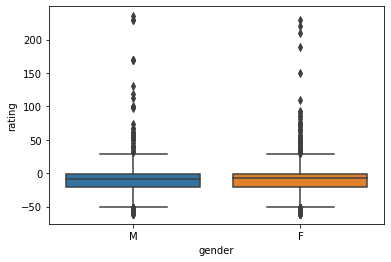

In [505]:
sns.boxplot(x='gender', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo lyties

### Reitingas pagal automobilio turėjimą

In [506]:
df6 = df2.groupby('car')['rating'].mean().sort_values().abs()
df6

car
Y    12.881023
N    12.270098
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal automobilio turėjimą'}, ylabel='rating'>

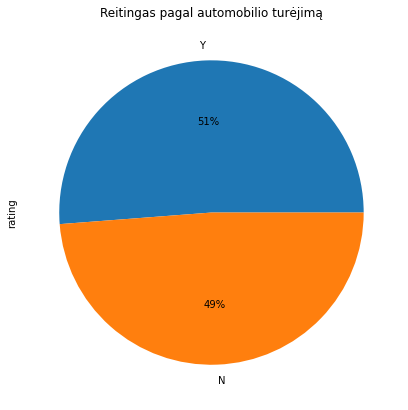

In [508]:
df6.plot.pie(y='', title='Reitingas pagal automobilio turėjimą', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='car', ylabel='rating'>

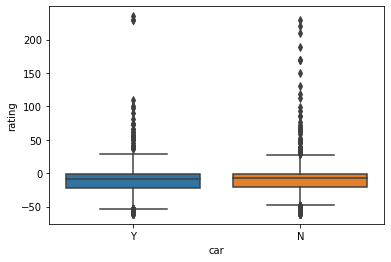

In [509]:
sns.boxplot(x='car', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo automobilio turėjimo.

### Reitingas pagal nekilnojamojo turto turėjimą

In [510]:
df7 = df2.groupby('realty')['rating'].mean().sort_values().abs()
df7

realty
N    12.984938
Y    12.266588
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal nekilnojamojo turto turėjimą'}, ylabel='rating'>

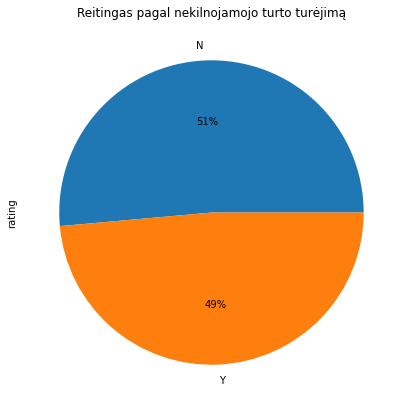

In [511]:
df7.plot.pie(y='', title='Reitingas pagal nekilnojamojo turto turėjimą', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='realty', ylabel='rating'>

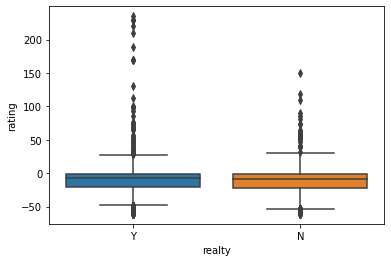

In [512]:
sns.boxplot(x='realty', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo nekilnojamojo turto turėjimo. Didesnę tikimybę negrąžinti paskolos laiku turi 
# žmonės turintys nekilnojamąją turtą.

### Reitingas pagal vaikų skaičių

In [513]:
df8 = df2.groupby('children')['rating'].mean().sort_values().abs()
df8

children
3     13.145585
2     12.757985
0     12.610849
5     12.250000
1     12.010144
4     10.761905
14     6.333333
7      6.000000
19     0.000000
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal vaikų'}, ylabel='rating'>

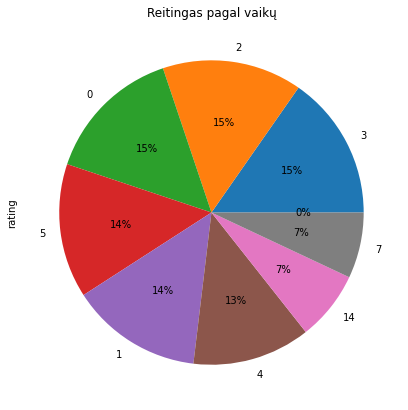

In [514]:
df8.plot.pie(y='', title='Reitingas pagal vaikų', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='children', ylabel='rating'>

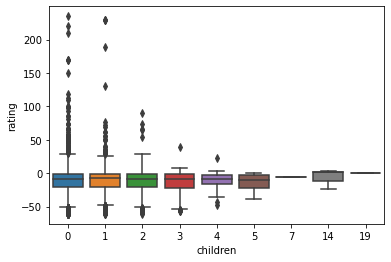

In [515]:
sns.boxplot(x='children', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo vaikų skaičiaus.

### Reitingas pagal šeiminę padėtį

In [517]:
df9 = df2.groupby('marital_status')['rating'].mean().sort_values().abs()
df9

marital_status
Married                 12.790602
Separated               12.777461
Civil marriage          12.455008
Widow                   11.596606
Single / not married    11.201491
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal šeiminę padėtį'}, ylabel='rating'>

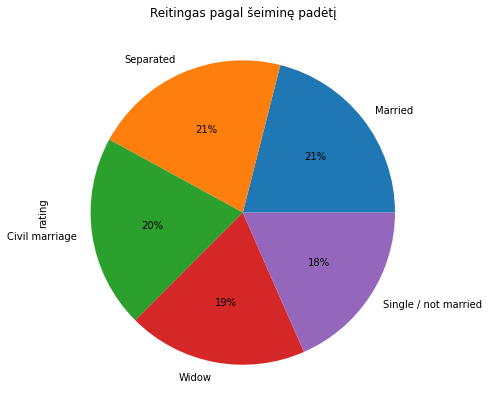

In [518]:
df9.plot.pie(y='', title='Reitingas pagal šeiminę padėtį', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='marital_status', ylabel='rating'>

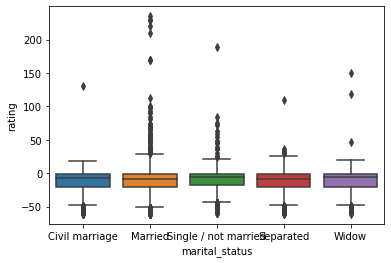

In [519]:
sns.boxplot(x='marital_status', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo šeimyninės padėties. Didesnę tikimybę negrąžinti paskolos laiku turi vedę
# žmonės.

### Reitingas pagal būsto tipą

In [520]:
df10 = df2.groupby('housing_type')['rating'].mean().sort_values().abs()
df10

housing_type
Co-op apartment        13.476190
Office apartment       12.606870
House / apartment      12.563076
Municipal apartment    12.483156
With parents           11.792230
Rented apartment       10.946087
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal būsto tipą'}, ylabel='rating'>

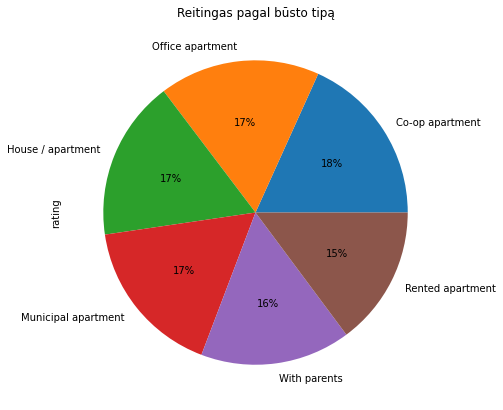

In [521]:
df10.plot.pie(y='', title='Reitingas pagal būsto tipą', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='housing_type', ylabel='rating'>

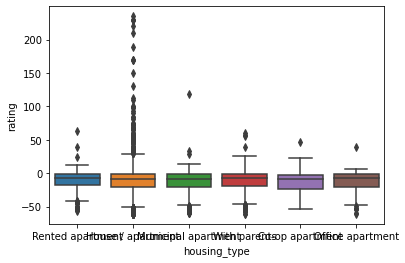

In [522]:
sns.boxplot(x='housing_type', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo būsto tipo. Didesnę tikimybę negrąžinti paskolos laiku turi žmonės,
# gyvenantis namuose/bute.

### Reitingas pagal profesijos tipą

In [523]:
df11 = df2.groupby('occupation')['rating'].mean().sort_values().abs()
df11

occupation
High skill tech staff    13.402025
Secretaries              13.370861
Accountants              13.320709
Drivers                  13.155753
Managers                 12.940903
Laborers                 12.680245
Medicine staff           12.662800
Core staff               12.605959
                         12.499249
Cleaning staff           11.989111
Low-skill Laborers       11.902857
Sales staff              11.849928
Private service staff    11.372093
Cooking staff            11.149618
IT staff                 10.783333
Security staff           10.260135
HR staff                  9.552941
Waiters/barmen staff      8.367816
Realty agents             7.215190
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal profesijos tipą'}, ylabel='rating'>

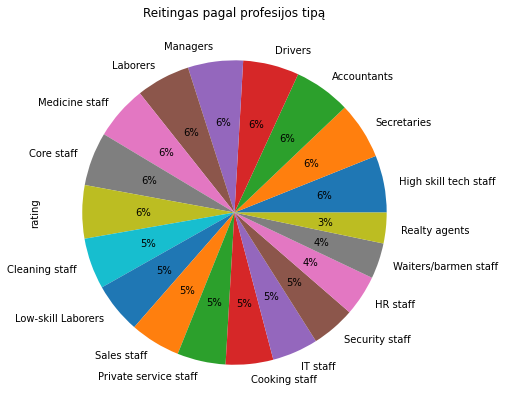

In [524]:
df11.plot.pie(y='', title='Reitingas pagal profesijos tipą', autopct='%1.0f%%', figsize=(7, 7))

In [525]:
# Kredito reitingas nepliklauso nuo profesijos tipo.

### Reitingas pagal šeimos dydį

In [526]:
df12 = df2.groupby('family_size')['rating'].mean().sort_values().abs()
df12

family_size
5.0     13.690176
2.0     12.840518
4.0     12.652930
3.0     12.142190
1.0     11.771719
6.0     11.672414
7.0     11.368421
15.0     6.333333
9.0      6.000000
20.0     0.000000
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal šeimos dydį'}, ylabel='rating'>

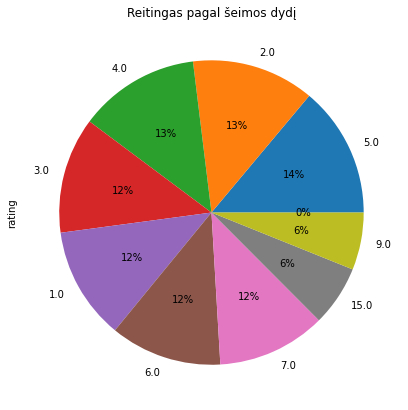

In [527]:
df12.plot.pie(y='', title='Reitingas pagal šeimos dydį', autopct='%1.0f%%', figsize=(7, 7))

In [ ]:
# Kredito reitingas nepliklauso nuo šeimos dydžio.

### Reitingas pagal amžių

In [530]:
df13 = df2.groupby('age')['rating'].mean().sort_values().abs()
df13

age
30.0    12.895181
40.0    12.797726
60.0    12.789831
50.0    12.787955
20.0    10.189274
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal amžių'}, ylabel='rating'>

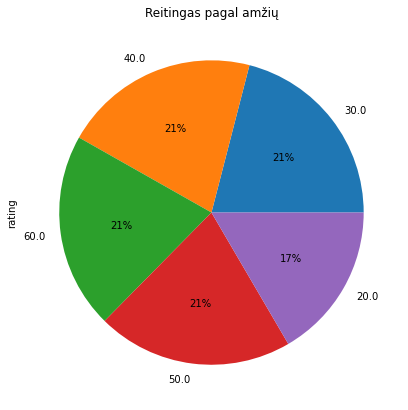

In [531]:
df13.plot.pie(y='', title='Reitingas pagal amžių', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='age', ylabel='rating'>

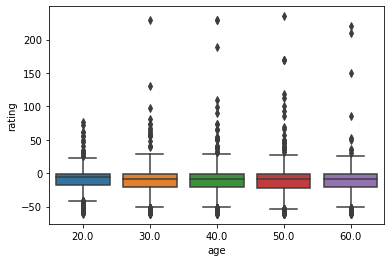

In [532]:
sns.boxplot(x='age', y='rating', data=df2)

In [ ]:
# Kredito reitingas nepliklauso nuo amžiaus, šiek tiek mažesnį reitingą turi 20-30 m. žmonės.

### Reitingas pagal darbo stažą

In [533]:
df14 = df2.groupby('years_employed')['rating'].mean().sort_values().abs()
df14

years_employed
40.0          22.039216
10.0          13.769375
30.0          13.465753
20.0          13.274625
Unemployed    12.318826
0.0           12.134873
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Reitingas pagal darbo stažą'}, ylabel='rating'>

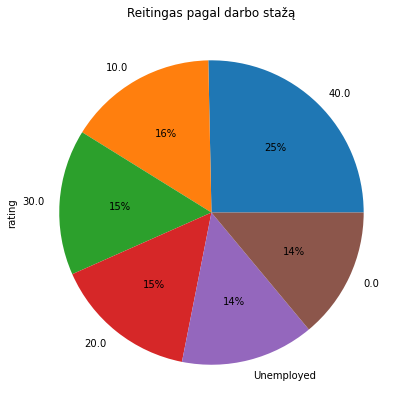

In [534]:
df14.plot.pie(y='', title='Reitingas pagal darbo stažą', autopct='%1.0f%%', figsize=(7, 7))

<AxesSubplot:xlabel='years_employed', ylabel='rating'>

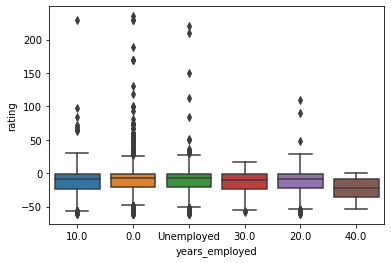

In [535]:
sns.boxplot(x='years_employed', y='rating', data=df2)

In [ ]:
# Aukštesnį kredito reitingą turi žmonės,
# gyvenantis namuose/bute, žmonės su darbo stažu virš 40 metų. Didesnę tikimybę negrąžinti paskolos laiku 
# turi žmonės be darbo arba turintys mažiau nei 20 metų staža.

## Koreliacija tarp pajamų dydžio ir kreditingumo reitingo

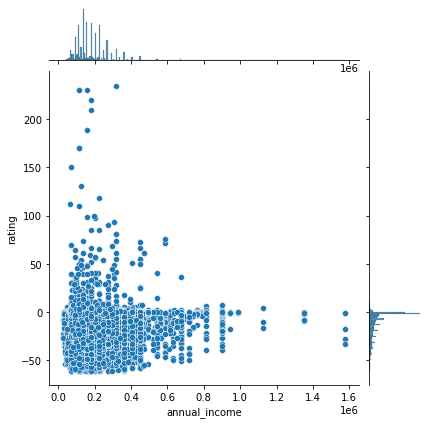

In [536]:
sns.jointplot(x='annual_income', y='rating', data=df2)

In [ ]:
# Kuo mažesnes pajamas gauna žmones, tuo daugiau jie naudojasi kredito kortelėmis ir tuo didesnę tikimybę 
# negrąžinti paskolos laiku.

## Išvados

In [ ]:
# 1. Paanalizavus duomenis išaiškinome, kad daugumą kredito kortelių naudotojų sudaro:
#    moterys (67%),
#    žmonės nuo 30 iki 60 metų (76%), 
#    žmonės turintys vidurinį išsilavinimą (69%), 
#    dirbantys žmonės (52%),
#    vedę žmonės (68%), 
#    žmonės turintys dviejų žmonių šeimą (53%), 
#    žmonės neturintys vaikų (69%), 
#    žmonės neturintys automobilio (63%), 
#    žmonės turintys nekilnojamąjį turtą (69%), 
#    žmonės gyvenantys namuose arba bute (90%),
#    žmonės turintys mažiau nei 10 metų darbo stažą (62%).
# 2. Pagal duomenis kredito reitingui įtakos turi pajamų šaltinis, išsilavinimas, darbo stažas.
# 3. Aukščiausią kreditingumo reitingą turi studentai, žmonės su akademiniu laipsniu, žmonės su darbo stažu virš 
#    40 metų, bet jie naudojasi kredito kortelėmis mažiau už kitų naudotojų tipus (sudaro ne daugiau nei 1% nuo
#    visų naudotojų).
# 4. Tarp pajamų dydžio ir kreditingumo reitingo yra koreliacija: kuo mažesnes pajamas gauna žmones, tuo daugiau 
#    jie naudojasi kredito kortelėmis ir tuo didesnę tikimybę negrąžinti paskolos laiku.

In [333]:
df2.to_csv('credit_card_analysis.csv')